# DM_GROUP_238 - Assignment 3

In [ ]:
#importing required libs and reading the data set

In [76]:
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx
from pyvis.network import Network

df = pd.read_excel('Dataset.xlsx', delimiter=',', header = None)
df.dataframeName = 'DataSet'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

There are 7501 rows and 20 columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


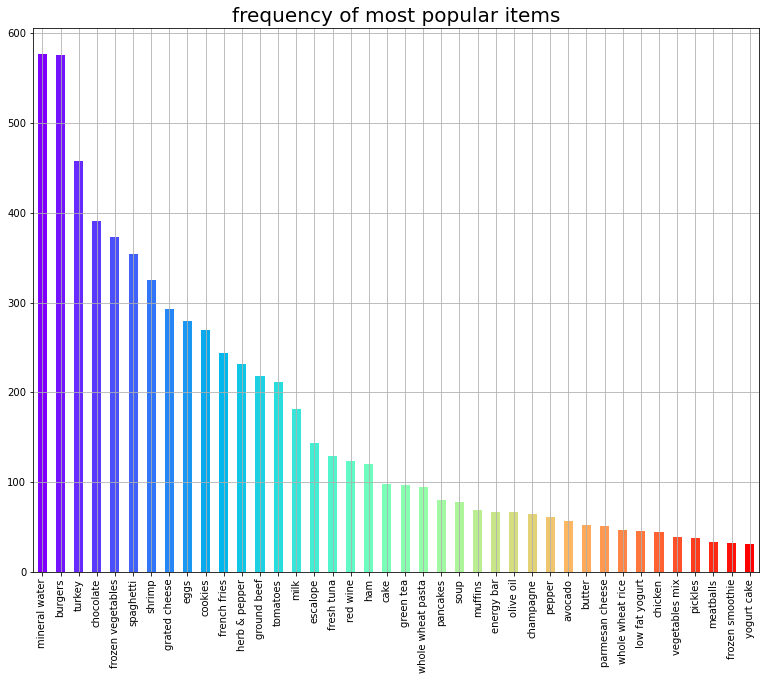

In [77]:
# Most Frequent Items Bar plot

color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,10))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Preprocess the data / cleaning the data

In [78]:
#change the data frame to list
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [79]:
#remove nan from the list
cData = []
for i in range(len(df)):
    cData.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='nan']) 
cData

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh





# Discover frequent patterns using apriori

# Rule Set1

In [80]:
#finding itemsets with support = 0.003
itemset1= list(apriori(cData,min_support=0.003))
print('No of itemsets: '+str(len(itemset1)))
result1 =[]
for item in itemset1:
    pair = item[0]
    items = [x for x in pair]
    result1.append(items)
itemsetFrame1 = pd.DataFrame.from_records(result1)
itemsetFrame1.to_csv("itemList1.csv",index=False,header=False)  
print(itemsetFrame1)

No of itemsets: 1443
                      0              1              2          3
0               almonds           None           None       None
1     antioxydant juice           None           None       None
2             asparagus           None           None       None
3               avocado           None           None       None
4           babies food           None           None       None
...                 ...            ...            ...        ...
1438        ground beef  mineral water      spaghetti   pancakes
1439        ground beef  mineral water      spaghetti   tomatoes
1440               milk      spaghetti  mineral water  olive oil
1441               milk  mineral water      spaghetti     shrimp
1442               milk  mineral water      spaghetti   tomatoes

[1443 rows x 4 columns]


In [81]:
#using apriori creating the rules
#min support= 0.003 and min confidence= 0.5 and min_lift=1
rule1 = list(apriori(cData,min_support=0.003,min_confidence=0.5,min_lift=1))

In [82]:
print('No of rules: '+ str(len(rule1)))
result1 =[]
for item in rule1:
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    rows = (value0,value1,value2,value3,value4)
    result1.append(rows)
    Label = ['Antecedents','Consequents','Support','Confidence','Lift']
frequent_suggestions1 = pd.DataFrame.from_records(result1,columns=Label)
frequent_suggestions1.to_excel("frequent_suggestions1.xlsx",index=False,columns=Label)  
print(frequent_suggestions1)

No of rules: 78
      Antecedents      Consequents  Support Confidence     Lift
0   mineral water        olive oil  0.00333    0.52083  2.18499
1   mineral water  frozen smoothie  0.00319        0.5  2.09759
2   mineral water             soup  0.00319    0.52173  2.18879
3     ground beef        spaghetti  0.00306    0.67647  3.88530
4            milk    mineral water  0.00359    0.50943  2.13717
..            ...              ...      ...        ...      ...
73  mineral water        spaghetti  0.00306    0.52272  3.00227
74    ground beef        spaghetti  0.00306        0.5  2.09759
75    ground beef    mineral water  0.00306    0.56097  3.22195
76           milk    mineral water  0.00306    0.62162  2.60782
77           milk    mineral water  0.00333    0.51020  2.93035

[78 rows x 5 columns]


In [83]:

G= nx.from_pandas_edgelist(frequent_suggestions1,source='Antecedents',target='Consequents',edge_attr='Lift')
net = Network(notebook=True)
net.from_nx(G)
net.show('graph.html')

#Relation with each item can be expressed in graph format as shown below




# Rule Set2
#min support= 0.004 and min confidence= 0.5


In [84]:

#finding itemsets with support = 0.004
itemset2= list(apriori(cData,min_support=0.004))
print('No of itemsets: '+str(len(itemset2)))
result2 =[]
for item in itemset2:
    pair = item[0]
    items = [x for x in pair]
    result2.append(items)
itemsetFrame2 = pd.DataFrame.from_records(result2)
itemsetFrame2.to_csv("itemList2.csv",index=False,header=False)  
print(itemsetFrame2)



No of itemsets: 959
                     0              1              2                  3
0              almonds           None           None               None
1    antioxydant juice           None           None               None
2            asparagus           None           None               None
3              avocado           None           None               None
4          babies food           None           None               None
..                 ...            ...            ...                ...
954          chocolate           milk  mineral water          spaghetti
955               milk  mineral water      spaghetti               eggs
956        ground beef  mineral water      spaghetti  frozen vegetables
957               milk  mineral water      spaghetti  frozen vegetables
958        ground beef           milk  mineral water          spaghetti

[959 rows x 4 columns]


In [85]:
#min support= 0.004 and min confidence= 0.5
rule2 = list(apriori(cData,min_support=0.004,min_confidence=0.5,min_lift=1))
print('Length of rule two is '+ str(len(rule2)))



Length of rule two is 35


In [86]:
print('No of rules: '+ str(len(rule2)))
result2 =[]
for item in rule2:
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    rows = (value0,value1,value2,value3,value4)
    result2.append(rows)
Label = ['Antecedents','Consequents','Support','Confidence','Lift']
frequent_suggestions2 = pd.DataFrame.from_records(result2,columns=Label)
frequent_suggestions2.to_excel("frequent_suggestions2.xlsx",index=False,columns=Label)  
print(frequent_suggestions2)



No of rules: 35
      Antecedents        Consequents  Support Confidence     Lift
0       chocolate      mineral water  0.00759    0.51818  2.17387
1     ground beef          spaghetti  0.00479    0.50704  2.91219
2   mineral water           pancakes  0.00479    0.52941  2.22098
3       chocolate      mineral water  0.00826    0.50406  2.11464
4       chocolate      mineral water  0.00559    0.55263  2.31839
5     cooking oil      mineral water  0.00639    0.54545  2.28828
6     ground beef        cooking oil  0.00479    0.57142  3.28199
7     cooking oil      mineral water  0.00466    0.59322  2.48867
8     ground beef      mineral water  0.01013    0.50666  2.12556
9   mineral water               soup  0.00493    0.54411  2.28267
10    ground beef      mineral water  0.00919    0.54330  2.27927
11    ground beef          spaghetti  0.00866    0.51181  2.93958
12  mineral water          olive oil  0.00653    0.57647  2.41840
13           soup      mineral water  0.00506    0.63333  2.

In [94]:

G= nx.from_pandas_edgelist(frequent_suggestions2,source='Antecedents',target='Consequents',edge_attr='Lift')
net = Network(notebook=True)
net.from_nx(G)
net.show('graph.html')

#Relation with each item can be expressed in graph format as shown below



















# Rule Set3
#min support= 0.005 and min confidence= 0.5

In [88]:
#finding itemsets with support = 0.005
itemset3= list(apriori(cData,min_support=0.005))
print('No of itemsets: '+str(len(itemset3)))
result3 =[]
for item in itemset3:
    pair = item[0]
    items = [x for x in pair]
    result3.append(items)
itemsetFrame3 = pd.DataFrame.from_records(result3)
itemsetFrame3.to_csv("itemList3.csv",index=False,header=False)  
print(itemsetFrame3)

No of itemsets: 725
                     0          1                 2
0              almonds       None              None
1    antioxydant juice       None              None
2              avocado       None              None
3                bacon       None              None
4       barbecue sauce       None              None
..                 ...        ...               ...
720      mineral water  spaghetti              soup
721      mineral water  spaghetti          tomatoes
722      mineral water  spaghetti            turkey
723      mineral water  spaghetti  whole wheat rice
724          spaghetti  olive oil          pancakes

[725 rows x 3 columns]


In [89]:
#min support= 0.005 and min confidence= 0.4
rule3 = list(apriori(cData,min_support=0.005,min_confidence=0.4,min_lift=1))
print('Length of rule3 '+ str(len(rule3)))

Length of rule3 89


In [90]:
print('No of rules: '+ str(len(rule3)))
result3 =[]
for item in rule3:
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    rows = (value0,value1,value2,value3,value4)
    result3.append(rows)
Label = ['Antecedents','Consequents','Support','Confidence','Lift']
frequent_suggestions3 = pd.DataFrame.from_records(result3,columns=Label)
frequent_suggestions3.to_excel("frequent_suggestions3.xlsx",index=False,columns=Label)  
print(frequent_suggestions3)

No of rules: 89
      Antecedents           Consequents  Support Confidence     Lift
0   mineral water  extra dark chocolate  0.00573    0.47777  2.00436
1     ground beef         mineral water  0.04092    0.41655  1.74752
2     light cream         mineral water  0.00733    0.47008  1.97209
3   mineral water           nonfat milk  0.00506    0.48717  2.04381
4   mineral water             olive oil  0.02759    0.41902  1.75790
..            ...                   ...      ...        ...      ...
84  mineral water             spaghetti  0.00853    0.40251  1.68863
85  mineral water             spaghetti  0.00746    0.52336  2.19561
86  mineral water             spaghetti  0.00933    0.44585  1.87046
87  mineral water             spaghetti  0.00626    0.44339  1.86013
88      spaghetti             olive oil  0.00506    0.46913  2.69447

[89 rows x 5 columns]


In [91]:

G= nx.from_pandas_edgelist(frequent_suggestions3,source='Antecedents',target='Consequents',edge_attr='Lift')
net = Network(notebook=True)
net.from_nx(G)
net.show('graph.html')

#Relation with each item can be expressed in graph format as shown below

# Conclusion

A lift value greater than 1 is selected for that the rule Antecedents and the rule Consequents appear more often together than expected, this means that the occurrence of the rule body has a positive effect on the occurrence of the rule head.

Case1
min support= 0.003 and min confidence= 0.5 and min_lift=1
No of itemsets: 1443
No of rules: 78

Case2
min support= 0.004 and min confidence= 0.5 and min_lift=1
No of itemsets: 959
No of rules: 35

Case3
min support= 0.005 and min confidence= 0.4 and min_lift=1
No of itemsets: 725
No of rules: 89

The most frequent association itemset are mineral water and ground beef with 
spaghetti and people always buy this three items together.


NB: All itemset and ruleset generated has been exported and attached
